Jack Nealon and Ryder Gallagher  
CPSC 222 - Dr. Gina Sprint - Gonzaga University  
12/6/2022

# Quantified Group Project - Music Streaming 
In this report, we are going to analyze my Spotify streaming data for the past year and calculate statistics depending on the information provided by Spotify. Included in this report, we are able to read in the history, clean it by replacing missing values, categorizing information, and adding additional supplemental information. From this we are then able to calcuate our statistcs and present them visually using tables and graphs.
1. Load the data
2. Clean the data
3. Visualize the data

### 1. Load the Data

In [8]:
#import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#Read in the raw, unprocessed data into a pandas dataframe
temp1_df = pd.read_json("JackStreamHist1.json")
temp2_df = pd.read_json("JackStreamHist2.json")
jack_df = pd.concat([temp1_df, temp2_df], ignore_index=True)

Information Collected Includes:
1. Date and Time (string)
1. Artist (string)
1. Track Name (string)
1. Seconds Played (float)

### 2. Clean the Data

In [9]:
jack_df.fillna(np.nan, inplace=True)
jack_df[['Date','Time']] = jack_df.endTime.str.split(expand=True)
jack_df = jack_df.drop('endTime', axis=1)
jack_df['msPlayed'] = jack_df['msPlayed'] / 1000
jack_df[['Year','Month','Day']] = jack_df.Date.str.split(pat='-', expand=True)
jack_df = jack_df.drop('Date', axis=1)
print(jack_df)

                        artistName  \
0                            ASKII   
1      Raiders Of The Lost Podcast   
2                            Sueco   
3                     All Time Low   
4                      $uicideboy$   
...                            ...   
12612                   Piff Marti   
12613                 Double A-Ron   
12614                 Sick Puppies   
12615                   PawPaw Rod   
12616                    Joey Trap   

                                               trackName  msPlayed   Time  \
0                                             Aurora Sky    20.695  20:01   
1                              TENET - Review & Analysis  1719.345  11:06   
2                                              Paralyzed   162.805  07:57   
3                             Monsters (feat. blackbear)   174.067  08:00   
4      ...And to Those I Love, Thanks for Sticking Ar...   168.489  08:03   
...                                                  ...       ...    ...   
1261

What are we cleaning: 
1. Splitting columns with multiple values into separate columns (and deleting the combined column we extracted values from)
1. Filling all missing values with the np.nan value
1. Converting values to more understandable units

Information Collected after cleaning:
1. Year (integer)
1. Month (integer)
1. Day (integer)
1. Time of playing (string)
1. Artist (string)
1. Track Name (string)
1. Seconds Played (float)

### 3. Aggregate the data and compute summary statistics

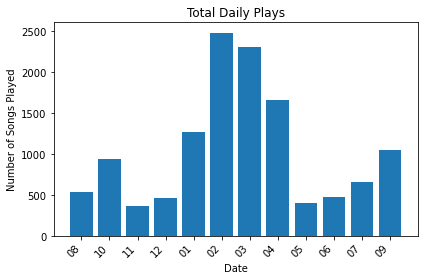

In [16]:
month_df = jack_df["Month"].value_counts(sort=False)
plt.bar(month_df.index, month_df)
plt.xticks(ha="right", rotation=45)
plt.title("Total Daily Plays")
plt.xlabel("Date")
plt.ylabel("Number of Songs Played")
plt.tight_layout()

This graph shows the total number of songs/podcast plays ranging from the beginning of my data (August 2021) to the end of my data (September 2022). Its interesting because I see the trend of listening to a lot of music from december to january and february before slowly stopping listening to as much music. My music habits then drop after april 2022 and slowly increasing from there. Its pretty cool becaue November 2021 was when I switched from the Silver Falls Brewery to The Noble Fox. We can see that I learned without music before taking over and running on autopilot before my leave at around april. I can see what I was doing and can correlate it to my real-life events :D.  

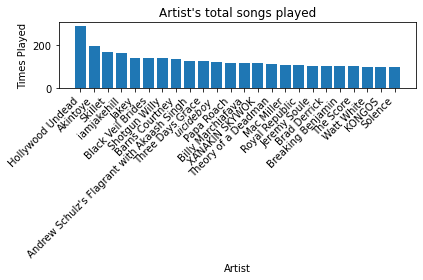

In [11]:
#BAR GRAPH - my graph that isnt scatter/line/histogram
artists_df = jack_df["artistName"].value_counts()
plt.bar(artists_df.index[0:24], artists_df[0:24])
plt.xticks(rotation=45, ha="right")
plt.title("Artist's total songs played")
plt.xlabel("Artist")
plt.ylabel("Times Played")
plt.tight_layout()

Yo, I didnt know how much Hollywood undead I listened to... dang. I didnt even go through a phase or a noticeable time where I was playing a crap ton of hollywood undead, the same with iamjakehill. This is weird, even I didnt know what my most played music was. If I had to make a list having never seen these numbers, I would probably identify probably 10-12 listed which is insane.  

### Hypothesis Testing

Question: Did I listen to more songs on average during the winter months (9-2) or during the summer months (3-8))

* Step 1: State the null and alternate hypothesis:
    * $H_0$: $WinterAvg \leq SummerAvg$
    * $H_1$: $WinterAvg > SummerAvg$

* Step 2: Select the level of significance:
    * $\alpha = 0.025$

* Step 3: Select the appropriate test statistic:
    * one sample --> ttest_1samp()
    * $t=\frac{\overline{x} - \mu}{s / \sqrt{n}}$

* Step 4: Formulate decision rule:
    * First, let’s find the critical value:
        * Since it's a one tailed test, go to Level of Significance for one-tailed test (alpha = 0.025) in the table. 
        * With df > 120 instances @ .025 significance; we find t = 1.960
        * If t-computed is > 1.960, then Reject $H_0$.
        * If t-computed is <= 1.960, then Reject $H_1$.

In [15]:
t, pval = stats.ttest_1samp(month_df, month_df.mean())
print(t, pval)

0.0 1.0
08     535
10     942
11     369
12     461
01    1268
02    2484
03    2312
04    1662
05     399
06     477
07     658
09    1050
Name: Month, dtype: int64


### Save spotify information to csv file

In [13]:
jack_df.to_csv("JackCleanedData.csv")